# Loading the pickled dataset

In [ ]:
import pickle
with open('dataUpdated30.pickle', 'rb') as pfl:
    data_new = pickle.load(pfl)

In [ ]:
data_new[0][0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,

# Shuffling the data

In [ ]:
import random
random.shuffle(data_new)

data_new[545][0].shape

(30, 30)

# Plotting a sample image

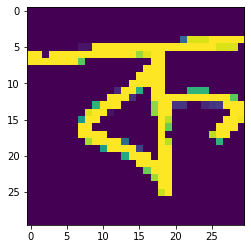

In [ ]:
import matplotlib.pyplot as plt


%matplotlib inline


plt.imshow(data_new[545][0])
plt.show()

In [ ]:
data_new[545][1]

12

# Train and test data splitting

In [ ]:
train_data = []

test_data = []


for i in range(0, len(data_new), 5):
  if i+5 < len(data_new):
    train_data.extend(data_new[i:i+5])
    test_data.append(data_new[i+5])

print(len(train_data))
print(len(test_data))

98945
19789


In [ ]:
import numpy as np
X_train = []
y_train = []

img_size = 30

for features, label in train_data:
  X_train.append(features)
  y_train.append(label)

X_train = np.array(X_train).reshape(-1, img_size*img_size)
y_train = np.array(y_train)

In [ ]:
print(len(X_train))
X_train.shape

98945


(98945, 900)

# Building a RF classifier

In [ ]:
from sklearn import ensemble

classifier = ensemble.RandomForestClassifier()

classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# Test data with labels, reshaping

In [ ]:
X_test = []
y_test = []

img_size = 30

for features, label in test_data:
  X_test.append(features)
  y_test.append(label)

X_test = np.array(X_test).reshape(-1, img_size*img_size)
y_test = np.array(y_test)

In [ ]:
score = classifier.score(X_test, y_test)

In [ ]:
print(f"Accuracy: {score*100:.2f}%")

Accuracy: 99.68%


# Value to character mapper

In [ ]:
vtc_map = {1:"অ", 2:"আ", 3:"ই", 4:"ঈ", 5:"উ", 6:"ঊ", 7:"ঋ", 8:"এ", 9:"ঐ", 10:"ও", 11:"ঔ",
           12:"ক", 13:"খ", 14:"গ", 15:"ঘ", 16:"ঙ", 17:"চ", 18:"ছ", 19:"জ", 20:"ঝ", 21:"ঞ",
              22:"ট", 23:"ঠ", 24:"ড", 25:"ঢ", 26:"ণ", 27:"ত", 28:"থ", 29:"দ", 30:"ধ", 31:"ন",
              32:"প", 33:"ফ", 34:"ব", 35:"ভ", 36:"ম", 37:"য", 38:"র", 39:"ল", 40:"শ", 41:"ষ",
              42:"স", 43:"হ", 44:"ড়", 45:"ঢ়", 46:"য়", 47:"ৎ", 48:"ং", 49:"ঃ", 50:"ঁ"}



# Predicting

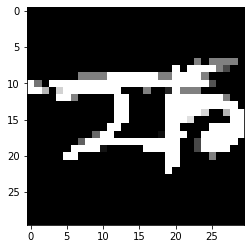

In [ ]:
img_position = 16000
img = X_test[img_position]
plt.imshow(img.reshape(30, 30), cmap='gray')
plt.show()

v = classifier.predict(X_test[img_position].reshape(-1, 30*30))

In [ ]:
print(f"The predicted word is: {vtc_map[v[0]]}")

The predicted word is: ফ


# Confusion Matrix

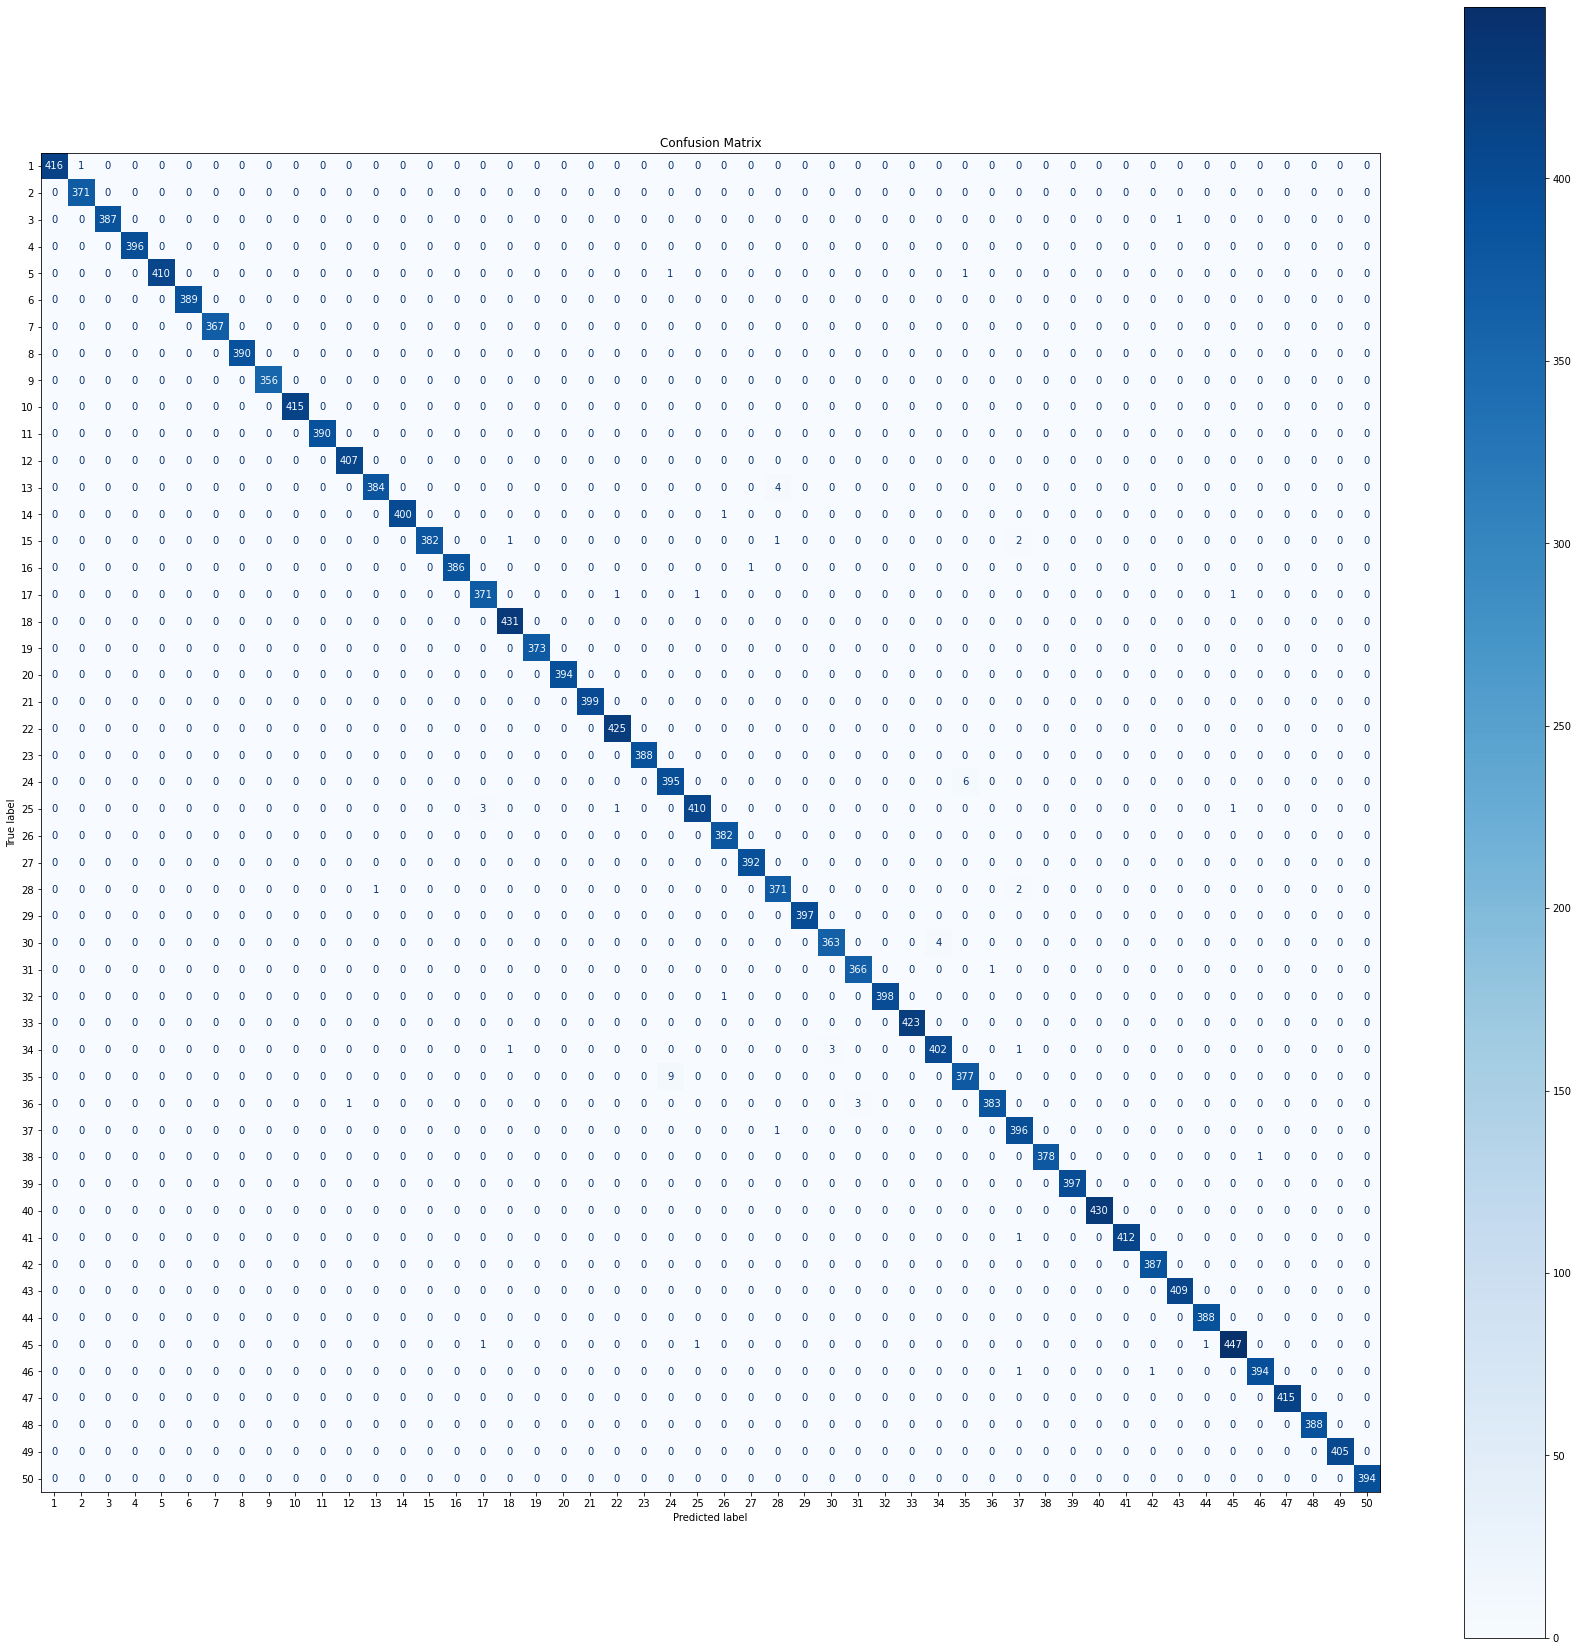

In [ ]:
%matplotlib inline
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [30, 30]
cm = plot_confusion_matrix(classifier, X_test, y_test, display_labels=set(y_test),
                                 cmap=plt.cm.Blues, values_format='d')

cm.ax_.set_title("Confusion Matrix")
plt.show()

# Calculating precision, recall and f-1 score

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = classifier.predict(X_test)

precision = precision_score(y_test, y_pred, average='weighted')
print(f"The precision is: {precision: .2f}.")

recall = recall_score(y_test, y_pred, average='weighted')
print(f"The recall is: {recall: .2f}.")

f1 = f1_score(y_test, y_pred, average='weighted')
print(f"The f1-score is: {f1: .2f}.")

The precision is:  1.00.
The recall is:  1.00.
The f1-score is:  1.00.


# Classification report

In [ ]:
from sklearn.metrics import classification_report

cl = classification_report(y_test, y_pred, target_names=vtc_map.values())

print(cl)



              precision    recall  f1-score   support

           অ       1.00      1.00      1.00       417
           আ       1.00      1.00      1.00       371
           ই       1.00      1.00      1.00       388
           ঈ       1.00      1.00      1.00       396
           উ       1.00      1.00      1.00       412
           ঊ       1.00      1.00      1.00       389
           ঋ       1.00      1.00      1.00       367
           এ       1.00      1.00      1.00       390
           ঐ       1.00      1.00      1.00       356
           ও       1.00      1.00      1.00       415
           ঔ       1.00      1.00      1.00       390
           ক       1.00      1.00      1.00       407
           খ       1.00      0.99      0.99       388
           গ       1.00      1.00      1.00       401
           ঘ       1.00      0.99      0.99       386
           ঙ       1.00      1.00      1.00       387
           চ       0.99      0.99      0.99       374
           ছ       1.00    